<a href="https://colab.research.google.com/github/guifzy/analise_estatistica_dados/blob/main/estatistica_palmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Intro

In [ ]:
import pandas as pd
import numpy as np
import regex as re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataFrames/Palmas dataset tratado.csv')
df.head()

,Unnamed: 0,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,trabalho,...,qualidade de vida nos últimos anos,auxílio do governo,satisfação,número de amigos palmas,lazer em palmas,frequência igreja,já morou em outros lugares,ocupação em outro município,sair de palmas,emprego específico
0,0,F,23,Solteiro,4,Não,1,C,4200.0,Ajuda a família,...,Melhorou,NENHUM,Pouco Satisfeito,Moderado,Bom,Menos de Uma ao Mês,NÃO,NaN,Não,OPERADOR DE CAIXA E DESIGNER DE SOMBRANCELHAS
1,1,M,38,Casado,3,Sim,2,E,5000.0,Ajuda a família,...,Melhorou,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Mais de Uma por Semana,BELÉM - PA,PEDREIRO,Não,GARI
2,2,M,26,Casado,4,Não,1,C,3000.0,Ajuda a família,...,Melhorou,BOLSA FAMÍLIA,Satisfeito,Moderado,Bom,Uma por Semana,GURUPI - TO,VIGIA,Não,SERVIÇOS GERAIS
3,3,F,26,Solteiro,5,Sim,1,C,3000.0,Recebe auxílio,...,Melhorou Muito,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Raramente Compareço,XINGUARA - PA,BALCONISTA,Sim,VENDEDORA
4,4,M,50,Viuvo,3,Sim,3+,A,1320.0,Sim,...,Melhorou,NENHUM,Muito Satisfeito,Moderado,Bom,Uma por Semana,FORTALEZA - CE,NaN,Não,PORTEIRO


# Tratando para análise estatística

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df['cidade natal'] = df['cidade natal'].str.extract(r'\b([A-Z]{2})\b')
df['cidade natal']

,cidade natal
0,TO
1,PA
2,MT
3,PA
4,CE
...,...
324,TO
325,TO
326,DO
327,TO


In [ ]:
df['moradores'].replace({'A':'1', 'B':'2', 'C':'3', 'D':'4', 'E':'5'}, inplace=True)
df['moradores'].unique()

<ipython-input-6-43ca8427403a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['moradores'].replace({'A':'1', 'B':'2', 'C':'3', 'D':'4', 'E':'5'}, inplace=True)


array(['3', '5', '1', '4', '2'], dtype=object)

In [ ]:
df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,trabalho,renda pessoal,...,qualidade de vida nos últimos anos,auxílio do governo,satisfação,número de amigos palmas,lazer em palmas,frequência igreja,já morou em outros lugares,ocupação em outro município,sair de palmas,emprego específico
0,F,23,Solteiro,4,Não,1,3,4200.0,Ajuda a família,2400.0,...,Melhorou,NENHUM,Pouco Satisfeito,Moderado,Bom,Menos de Uma ao Mês,NÃO,NaN,Não,OPERADOR DE CAIXA E DESIGNER DE SOMBRANCELHAS
1,M,38,Casado,3,Sim,2,5,5000.0,Ajuda a família,3800.0,...,Melhorou,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Mais de Uma por Semana,BELÉM - PA,PEDREIRO,Não,GARI
2,M,26,Casado,4,Não,1,3,3000.0,Ajuda a família,1500.0,...,Melhorou,BOLSA FAMÍLIA,Satisfeito,Moderado,Bom,Uma por Semana,GURUPI - TO,VIGIA,Não,SERVIÇOS GERAIS
3,F,26,Solteiro,5,Sim,1,3,3000.0,Recebe auxílio,1800.0,...,Melhorou Muito,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Raramente Compareço,XINGUARA - PA,BALCONISTA,Sim,VENDEDORA
4,M,50,Viuvo,3,Sim,3+,1,1320.0,Sim,1320.0,...,Melhorou,NENHUM,Muito Satisfeito,Moderado,Bom,Uma por Semana,FORTALEZA - CE,NaN,Não,PORTEIRO


In [ ]:
df.columns

Index(['sexo', 'idade', 'estado civil', 'nível de instrução', 'casa própria',
       'filhos', 'moradores', 'renda familiar', 'trabalho', 'renda pessoal',
       'tempo em palmas', 'renda anterior', 'qualidade de vida imigrante',
       'bens ao imigrar', 'qualidade em cinco anos',
       'pode melhorar em cinco anos', 'violencia', 'qualidade educaional',
       'setor de trabalho', 'que setor recomenda', 'cidade natal',
       'anos de trabalho', 'drogas em palmas',
       'qualidade de vida nos últimos anos', 'auxílio do governo',
       'satisfação', 'número de amigos palmas', 'lazer em palmas',
       'frequência igreja', 'já morou em outros lugares',
       'ocupação em outro município', 'sair de palmas', 'emprego específico'],
      dtype='object')

In [ ]:
df['já morou em outros lugares'] = df['já morou em outros lugares'].apply(lambda x: 'SIM' if x != 'NÃO' and np.nan else 'NÃO')
df['já morou em outros lugares'].unique()

array(['NÃO', 'SIM'], dtype=object)

In [ ]:
df['já morou em outros lugares'].value_counts()

,count
já morou em outros lugares,
SIM,245
NÃO,84


In [ ]:
df['tempo em palmas'].unique()

array(['23', '11', '3', '5', '22', '4', '10', '6', '8', '29', '2', '30',
       '32', '34', '27', '20', '9', '2 MESES', '7', '1', '4 MESES', '12',
       '16', '15', '21', '31', '14', '13', '25', '18', '19', nan, '24',
       '35', '5 MESES', '26', '6 MESES', '28', '17', '3 MESES', '7 MESES',
       '44', '45', '1 MES'], dtype=object)

In [ ]:
df['tempo em palmas'] = df['tempo em palmas'].replace({'4 MESES':'0.33', '5 MESES':'0.41', '6 MESES':'0.5', '3 MESES':'0.25', '2 MESES': '0.16', '7 MESES': '0.59', '1 MES' : '0.08'})
df['tempo em palmas'].unique()

array(['23', '11', '3', '5', '22', '4', '10', '6', '8', '29', '2', '30',
       '32', '34', '27', '20', '9', '0.16', '7', '1', '0.33', '12', '16',
       '15', '21', '31', '14', '13', '25', '18', '19', nan, '24', '35',
       '0.41', '26', '0.5', '28', '17', '0.25', '0.59', '44', '45',
       '0.08'], dtype=object)

In [ ]:
df['tempo em palmas'] = df['tempo em palmas'].astype(float)

# Valores Vazios

In [ ]:
df.isnull().sum()

,0
sexo,1
idade,0
estado civil,0
nível de instrução,0
casa própria,2
filhos,0
moradores,0
renda familiar,0
trabalho,0
renda pessoal,0


In [ ]:
df.shape

(329, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sexo                                328 non-null    object 
 1   idade                               329 non-null    int64  
 2   estado civil                        329 non-null    object 
 3   nível de instrução                  329 non-null    int64  
 4   casa própria                        327 non-null    object 
 5   filhos                              329 non-null    object 
 6   moradores                           329 non-null    object 
 7   renda familiar                      329 non-null    float64
 8   trabalho                            329 non-null    object 
 9   renda pessoal                       329 non-null    float64
 10  tempo em palmas                     327 non-null    float64
 11  renda anterior                      159 non-n

- Empre especifico

In [ ]:
df.dropna(subset='emprego específico', inplace=True)
df['emprego específico'].isnull().sum()

0

- Anos de Trabalho

In [ ]:
df['anos de trabalho'].unique()

array(['6', '22', '5', '30', '3', '10', '20', '0', '1', '2', '25', '32',
       '36', '35', '34', '14', '15', '46', '48', '4', '8', '17', '50',
       '40', '44', '31', '18', '21', '13', nan, '53', '63', '9', '19',
       '38', '12', '26', '7', '23', '28', '52', '60', '16', '27', '11',
       '11 MESES', '3 MESES', '4 MESES', '1 MES', '24'], dtype=object)

In [ ]:
df['anos de trabalho'] = df['anos de trabalho'].replace({'11 MESES':'0.91', '3 MESES':'0.25', '4 MESES':'0.33', '1 MES':'0.08', np.nan: '0'})

In [ ]:
df['anos de trabalho'] = df['anos de trabalho'].astype(float)

In [ ]:
df['anos de trabalho'] = df['anos de trabalho'].replace({0:np.nan})

In [ ]:
df['anos de trabalho'].unique()

array([ 6.  , 22.  ,  5.  , 30.  ,  3.  , 10.  , 20.  ,   nan,  1.  ,
        2.  , 25.  , 32.  , 36.  , 35.  , 34.  , 14.  , 15.  , 46.  ,
       48.  ,  4.  ,  8.  , 17.  , 50.  , 40.  , 44.  , 31.  , 18.  ,
       21.  , 13.  , 53.  , 63.  ,  9.  , 19.  , 38.  , 12.  , 26.  ,
        7.  , 23.  , 28.  , 52.  , 60.  , 16.  , 27.  , 11.  ,  0.91,
        0.25,  0.33,  0.08, 24.  ])

In [ ]:
df['anos de trabalho'].fillna(df['anos de trabalho'].median(), inplace=True)
df['anos de trabalho'].isnull().sum()

<ipython-input-23-6dbe302d3eb7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['anos de trabalho'].fillna(df['anos de trabalho'].median(), inplace=True)


0

- Remover ocupação em outro municipio

In [ ]:
df.drop(columns='ocupação em outro município', inplace=True)

- Renda anterior

In [ ]:
df['renda anterior'].unique()

array([   nan,  1500.,   900.,     0.,  2000.,   850.,  1400.,  1000.,
        3000.,  1800.,   800.,  2500.,  1300.,  2600.,  2614.,   300.,
         500.,  3500.,   100., 18000.,  5000.,   400., 10000.,  1100.,
        4000., 14000.,  6000., 12000.,   650.,   950.,   700.,   724.,
        1212.,  1050.,   750.,  8000.,   460.,  1200., 15000.,  1250.,
        5011.,   600.,  1700.,  1750.,  1320., 30000.,   200.])

In [ ]:
df['renda anterior'].describe()

,renda anterior
count,149.000000
mean,2625.107383
std,3577.315079
min,0.000000
25%,1000.000000
50%,1500.000000
75%,3000.000000
max,30000.000000


In [ ]:
df['renda anterior'].fillna(df['renda anterior'].median(), inplace=True)
df['renda anterior'].isnull().sum()

<ipython-input-27-8c62dbb420e6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['renda anterior'].fillna(df['renda anterior'].median(), inplace=True)


0

- Removendo o restante

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
sexo,0
idade,0
estado civil,0
nível de instrução,0
casa própria,0
filhos,0
moradores,0
renda familiar,0
trabalho,0
renda pessoal,0


In [ ]:
df.shape

(278, 32)

In [ ]:
df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,trabalho,renda pessoal,...,drogas em palmas,qualidade de vida nos últimos anos,auxílio do governo,satisfação,número de amigos palmas,lazer em palmas,frequência igreja,já morou em outros lugares,sair de palmas,emprego específico
0,F,23,Solteiro,4,Não,1,3,4200.0,Ajuda a família,2400.0,...,Moderado,Melhorou,NENHUM,Pouco Satisfeito,Moderado,Bom,Menos de Uma ao Mês,NÃO,Não,OPERADOR DE CAIXA E DESIGNER DE SOMBRANCELHAS
1,M,38,Casado,3,Sim,2,5,5000.0,Ajuda a família,3800.0,...,Baixo,Melhorou,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Mais de Uma por Semana,SIM,Não,GARI
2,M,26,Casado,4,Não,1,3,3000.0,Ajuda a família,1500.0,...,Baixo,Melhorou,BOLSA FAMÍLIA,Satisfeito,Moderado,Bom,Uma por Semana,SIM,Não,SERVIÇOS GERAIS
3,F,26,Solteiro,5,Sim,1,3,3000.0,Recebe auxílio,1800.0,...,Baixo,Melhorou Muito,BOLSA FAMÍLIA,Pouco Satisfeito,Moderado,Bom,Raramente Compareço,SIM,Sim,VENDEDORA
4,M,50,Viuvo,3,Sim,3+,1,1320.0,Sim,1320.0,...,Alto,Melhorou,NENHUM,Muito Satisfeito,Moderado,Bom,Uma por Semana,SIM,Não,PORTEIRO


In [ ]:
df.columns

Index(['sexo', 'idade', 'estado civil', 'nível de instrução', 'casa própria',
       'filhos', 'moradores', 'renda familiar', 'trabalho', 'renda pessoal',
       'tempo em palmas', 'renda anterior', 'qualidade de vida imigrante',
       'bens ao imigrar', 'qualidade em cinco anos',
       'pode melhorar em cinco anos', 'violencia', 'qualidade educaional',
       'setor de trabalho', 'que setor recomenda', 'cidade natal',
       'anos de trabalho', 'drogas em palmas',
       'qualidade de vida nos últimos anos', 'auxílio do governo',
       'satisfação', 'número de amigos palmas', 'lazer em palmas',
       'frequência igreja', 'já morou em outros lugares', 'sair de palmas',
       'emprego específico'],
      dtype='object')

In [ ]:
df.to_csv('Palmas dataset tratado.csv')
df.to_excel('Palmas dataset tratado.xlsx')

# Visualização

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- Distribuição de Gênero

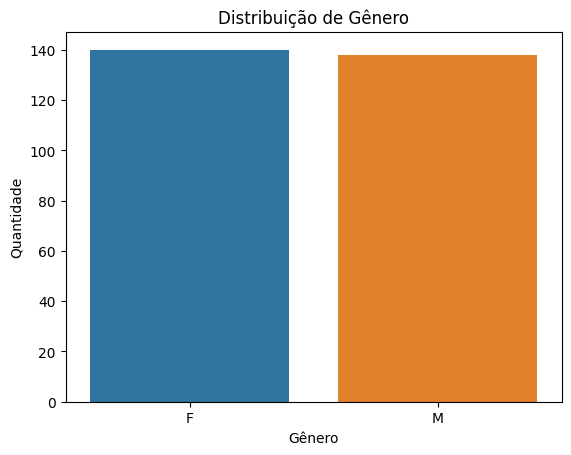

In [ ]:
sns.countplot(x='sexo', data=df, hue='sexo')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.title('Distribuição de Gênero')
plt.show()

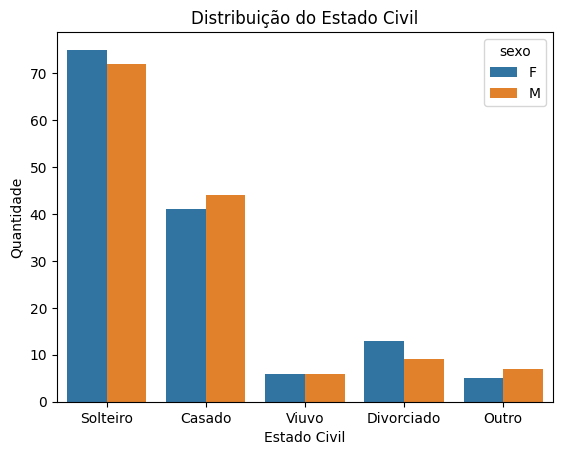

In [ ]:
sns.countplot(x='estado civil', data=df, hue='sexo')
plt.xlabel('Estado Civil')
plt.ylabel('Quantidade')
plt.title('Distribuição do Estado Civil')
plt.show()

- Faixa Etária

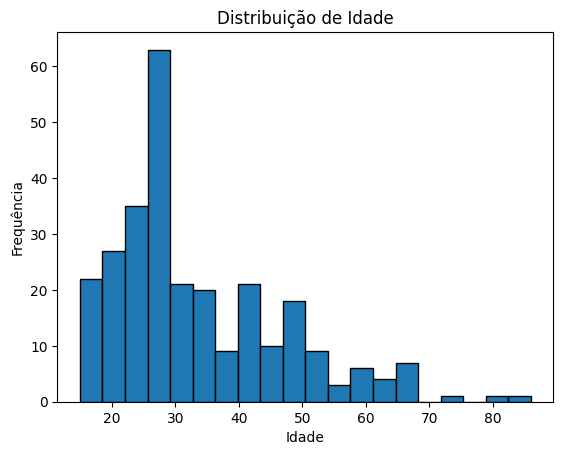

In [ ]:
plt.hist(df['idade'], bins=20, edgecolor='black')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

- Estado Civil e Nível de Instrução

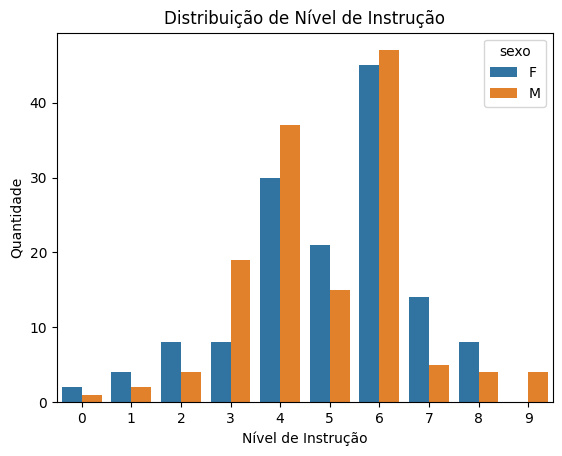

In [ ]:
sns.countplot(x='nível de instrução', data=df, hue='sexo')
plt.xlabel('Nível de Instrução')
plt.ylabel('Quantidade')
plt.title('Distribuição de Nível de Instrução')
plt.show()

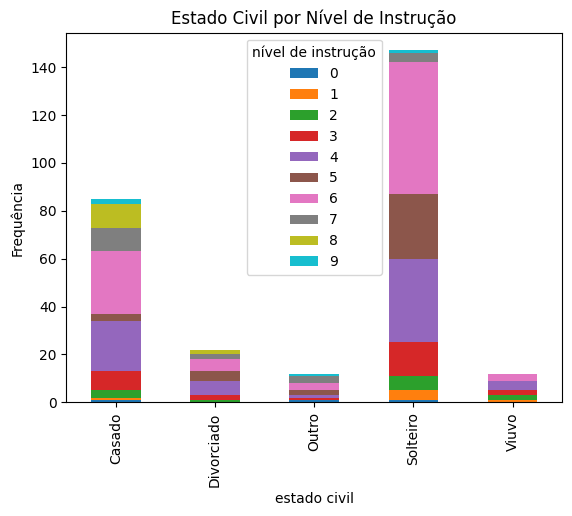

In [ ]:
pd.crosstab(df['estado civil'], df['nível de instrução']).plot(kind='bar', stacked=True)
plt.title('Estado Civil por Nível de Instrução')
plt.ylabel('Frequência')
plt.show()



- **0**: Sem escolaridade
- **1**: Fundamental incompleto
- **2**: Fundamental completo
- **3**: Médio incompleto
- **4**: Médio completo
- **5**: Superior incompleto
- **6**: Superior completo
- **7**: Pós-graduação
- **8**: Mestrado
- **9**: Doutorado

- Propriedade de Casa

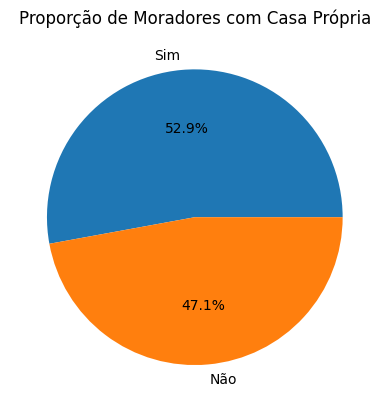

In [ ]:
df['casa própria'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporção de Moradores com Casa Própria')
plt.ylabel('')
plt.show()

- Número de Filhos e Moradores na Casa

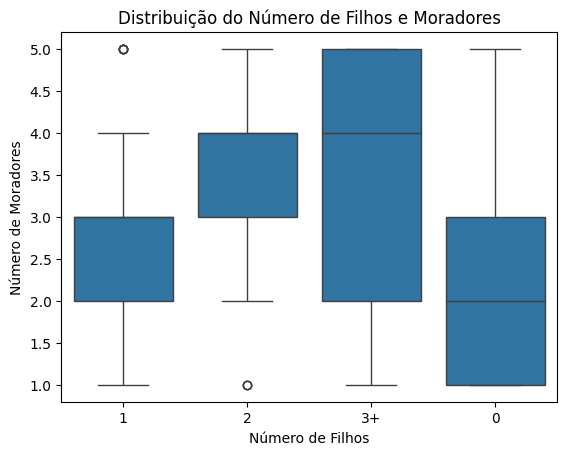

In [ ]:
sns.boxplot(data=df, x = 'filhos', y = df['moradores'].astype(int).sort_values())
plt.xlabel('Número de Filhos')
plt.ylabel('Número de Moradores')
plt.title('Distribuição do Número de Filhos e Moradores')
plt.show()

- Renda Familiar e Renda Pessoal

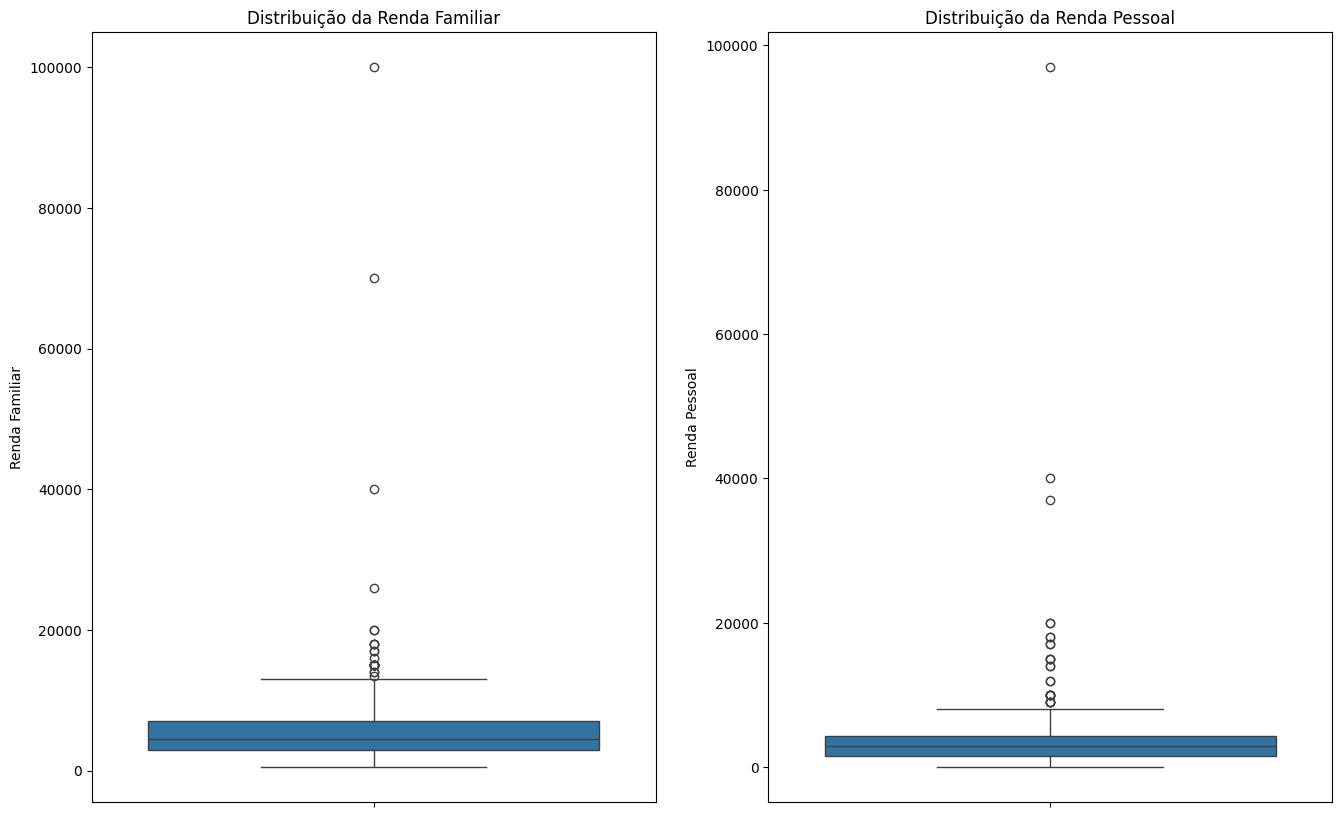

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

sns.boxplot(y='renda familiar', data=df, ax=axes[0])
axes[0].set_title('Distribuição da Renda Familiar')
axes[0].set_ylabel('Renda Familiar')

sns.boxplot(y='renda pessoal', data=df, ax=axes[1])
axes[1].set_title('Distribuição da Renda Pessoal')
axes[1].set_ylabel('Renda Pessoal')

plt.show()

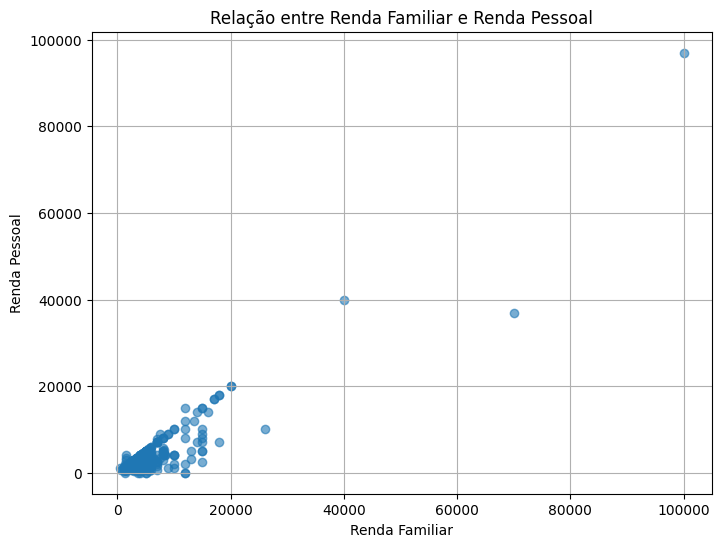

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['renda familiar'], df['renda pessoal'], alpha=0.6)
plt.title('Relação entre Renda Familiar e Renda Pessoal')
plt.xlabel('Renda Familiar')
plt.ylabel('Renda Pessoal')
plt.grid()
plt.show()

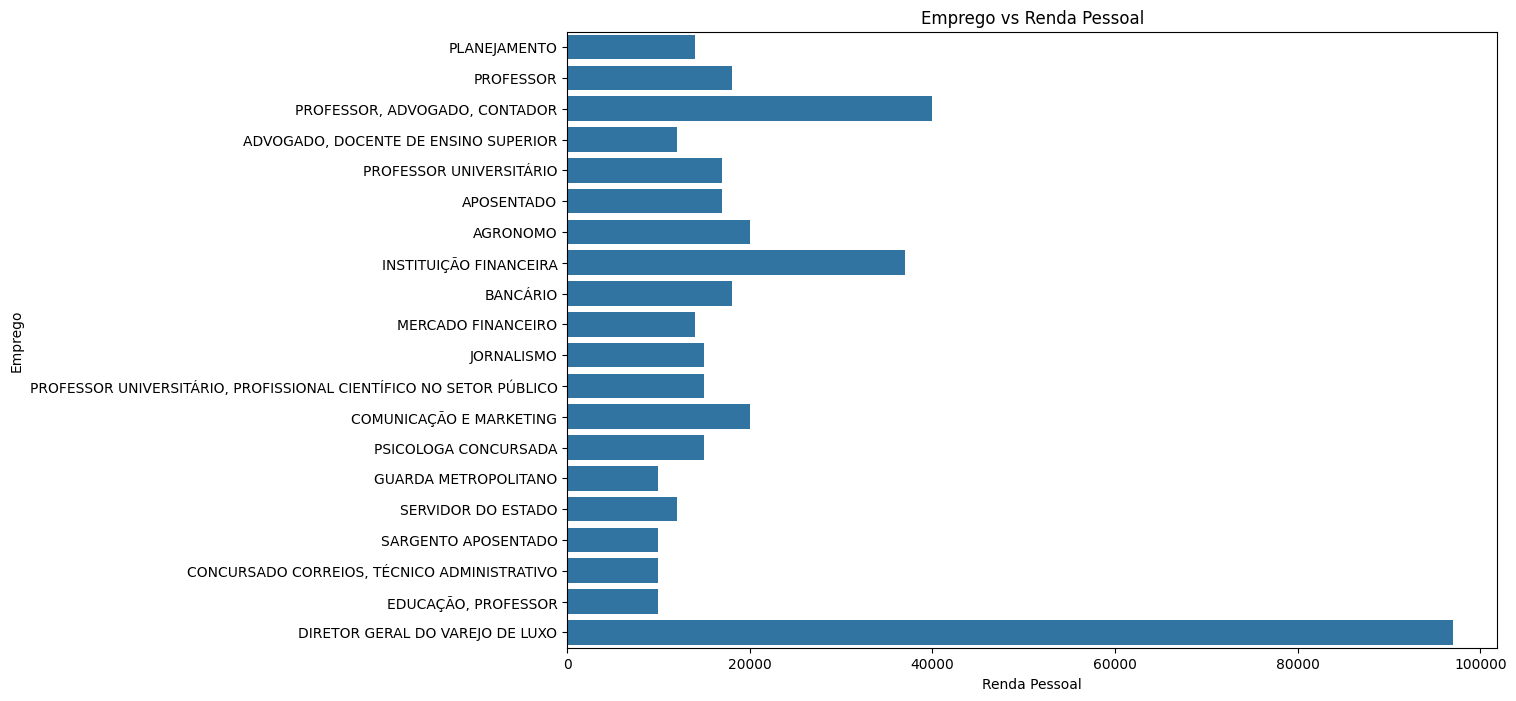

In [ ]:
top_20_salario = df.sort_values(by=['renda pessoal'], ascending=False)['emprego específico'].head(20).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_20_salario, x=df['renda pessoal'], data=df)
plt.title('Emprego vs Renda Pessoal')
plt.ylabel('Emprego')
plt.xlabel('Renda Pessoal')
plt.show()

- Tempo em Palmas e Anos de Trabalho

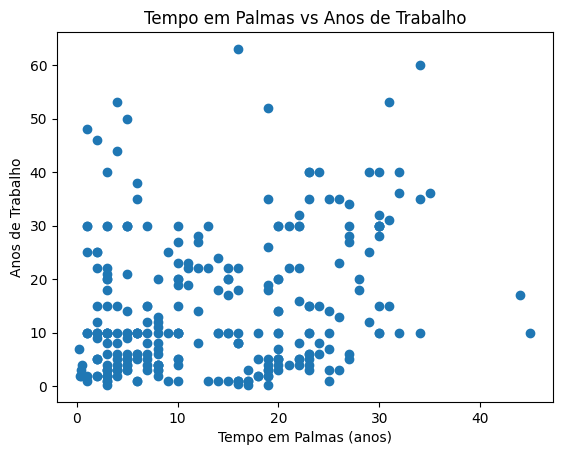

In [ ]:
plt.scatter(x = df['tempo em palmas'], y = df['anos de trabalho'])
plt.title('Tempo em Palmas vs Anos de Trabalho')
plt.xlabel('Tempo em Palmas (anos)')
plt.ylabel('Anos de Trabalho')
plt.show()

- Comparação de Avaliações

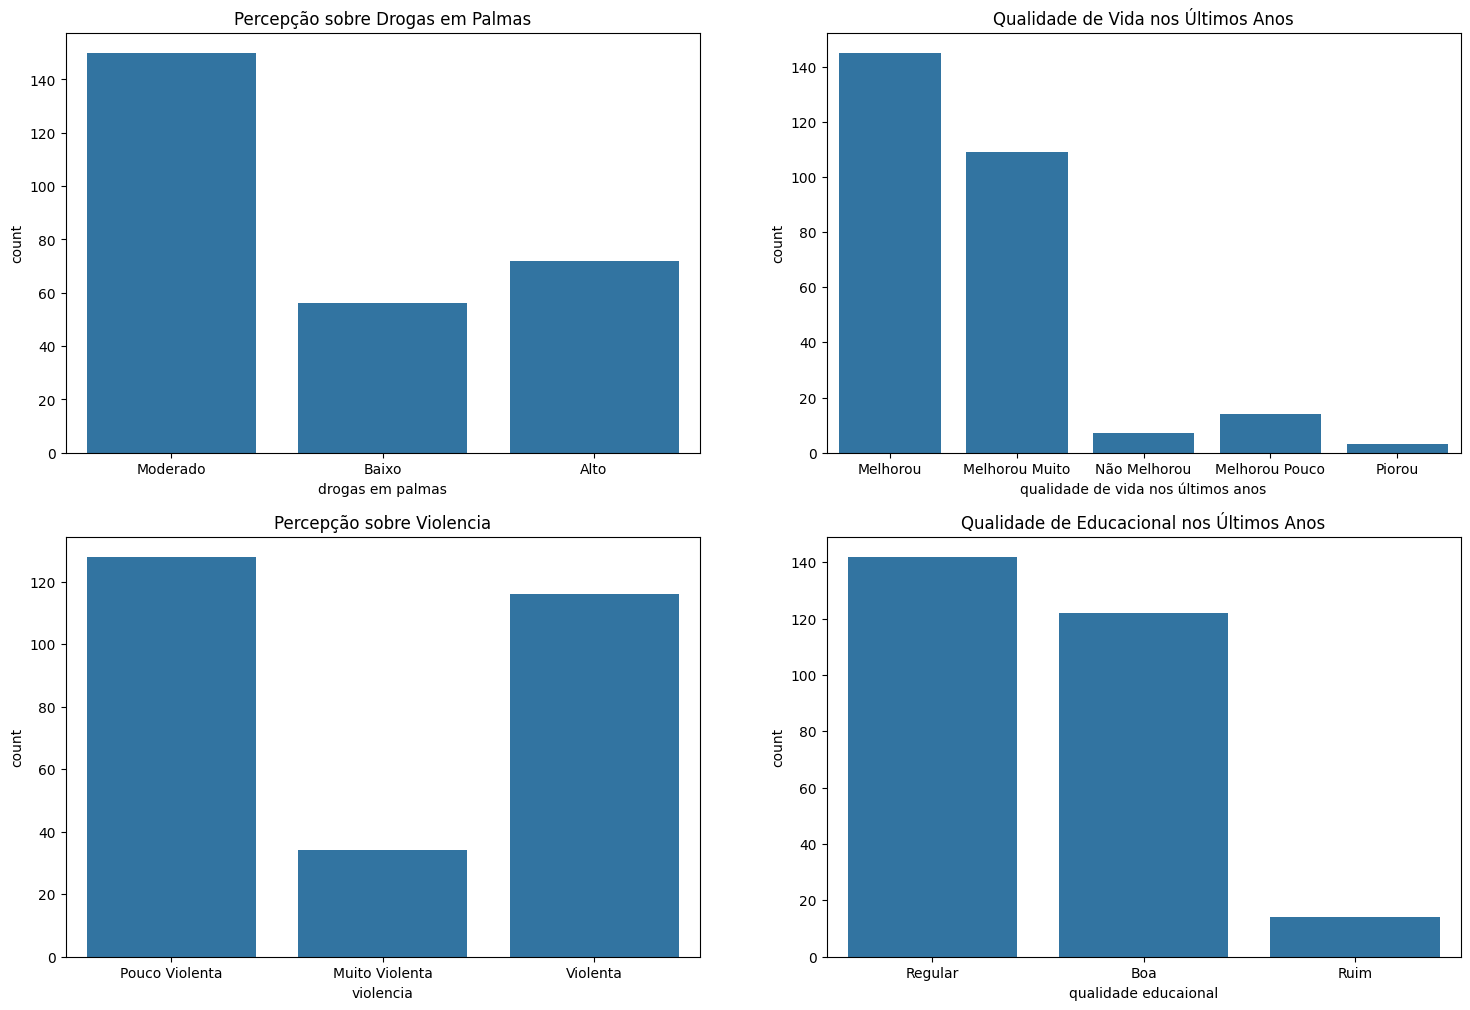

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico 8.1 - Percepção sobre Drogas em Palmas
sns.countplot(x='drogas em palmas', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Percepção sobre Drogas em Palmas')

# Gráfico 8.2 - Qualidade de Vida nos Últimos Anos
sns.countplot(x='qualidade de vida nos últimos anos', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Qualidade de Vida nos Últimos Anos')

sns.countplot(x='violencia', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Percepção sobre Violencia')

# Gráfico 8.2 - Qualidade de Vida nos Últimos Anos
sns.countplot(x='qualidade educaional', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Qualidade de Educacional nos Últimos Anos')

plt.show()

- Setores de Trabalho

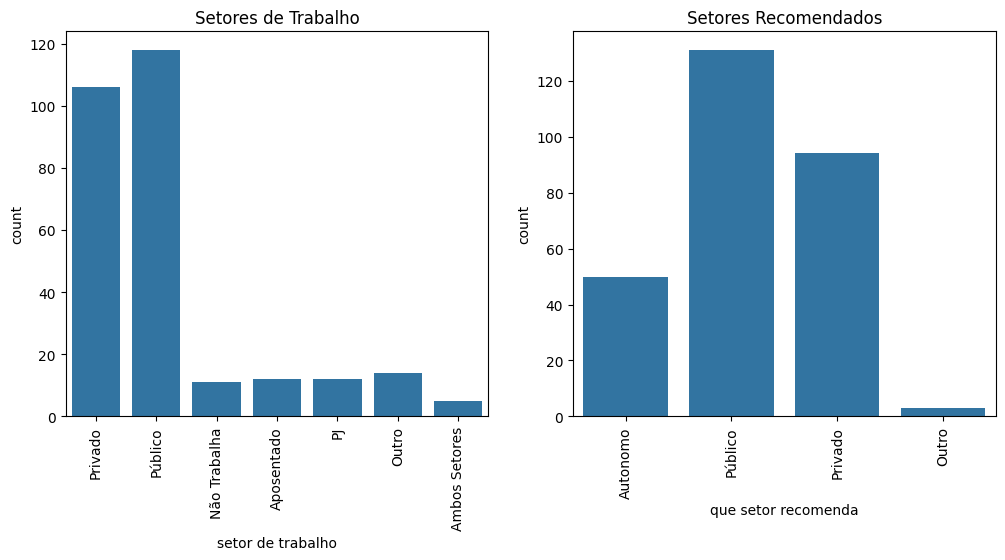

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='setor de trabalho', data=df, ax=axes[0])
axes[0].set_title('Setores de Trabalho')
axes[0].tick_params(axis='x', rotation=90)

# Gráfico 9.2 - Setores Recomendados
sns.countplot(x='que setor recomenda', data=df, ax=axes[1])
axes[1].set_title('Setores Recomendados')
axes[1].tick_params(axis='x', rotation=90)

# Categorizando

> Agora, para realizar testes estatísticos e modelagens em cima destes dados, irei primeiro categorizas os valores das colunas.

Definição do que será categorizado com Dummies e o que será com OneHot

**Dummies:** a escolha de colocar dummies, será para variaveis onde a classificação em grupos será de importância extrema.

**OneHot:** a escolha de onehot será para quando a categorização pode ser interpretado como valores continuos.

In [ ]:
df.columns

Index(['sexo', 'idade', 'estado civil', 'nível de instrução', 'casa própria',
       'filhos', 'moradores', 'renda familiar', 'trabalho', 'renda pessoal',
       'tempo em palmas', 'renda anterior', 'qualidade de vida imigrante',
       'bens ao imigrar', 'qualidade em cinco anos',
       'pode melhorar em cinco anos', 'violencia', 'qualidade educaional',
       'setor de trabalho', 'que setor recomenda', 'cidade natal',
       'anos de trabalho', 'drogas em palmas',
       'qualidade de vida nos últimos anos', 'auxílio do governo',
       'satisfação', 'número de amigos palmas', 'lazer em palmas',
       'frequência igreja', 'já morou em outros lugares', 'sair de palmas',
       'emprego específico'],
      dtype='object')

 > Dummies:

In [ ]:
dummies = ['trabalho', 'setor de trabalho', 'que setor recomenda', 'cidade natal', 'auxílio do governo',
           'já morou em outros lugares']

In [ ]:
df = pd.get_dummies(df, columns=dummies, drop_first=True)
df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,renda pessoal,tempo em palmas,...,cidade natal_SP,cidade natal_TO,auxílio do governo_AUXÍLIO BRASIL,auxílio do governo_AUXÍLIO EMERGENCIAL,auxílio do governo_BOLSA ESCOLAR,auxílio do governo_BOLSA FAMÍLIA,auxílio do governo_NENHUM,auxílio do governo_SEGURO DESEMPREGO,auxílio do governo_SIM,já morou em outros lugares_SIM
0,F,23,Solteiro,4,Não,1,3,4200.0,2400.0,23.0,...,False,True,False,False,False,False,True,False,False,False
1,M,38,Casado,3,Sim,2,5,5000.0,3800.0,11.0,...,False,False,False,False,False,True,False,False,False,True
2,M,26,Casado,4,Não,1,3,3000.0,1500.0,3.0,...,False,False,False,False,False,True,False,False,False,True
3,F,26,Solteiro,5,Sim,1,3,3000.0,1800.0,5.0,...,False,False,False,False,False,True,False,False,False,True
4,M,50,Viuvo,3,Sim,3+,1,1320.0,1320.0,22.0,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
df = pd.get_dummies(df, columns=['emprego específico'])
df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,renda pessoal,tempo em palmas,...,emprego específico_TÉCNICO FARMÁCIA,emprego específico_UBER,emprego específico_VENDA DE IMÓVEIS,emprego específico_VENDAS,emprego específico_VENDEDOR,emprego específico_VENDEDORA,emprego específico_VENDEDORA DE FARMÁCIA,emprego específico_VERIFICAÇÃO E IMPORTAÇÃO DE PRODUTOS,"emprego específico_VIDEOMARKER, COMUNICAÇÃO",emprego específico_ÁREA DA SAÚDE
0,F,23,Solteiro,4,Não,1,3,4200.0,2400.0,23.0,...,False,False,False,False,False,False,False,False,False,False
1,M,38,Casado,3,Sim,2,5,5000.0,3800.0,11.0,...,False,False,False,False,False,False,False,False,False,False
2,M,26,Casado,4,Não,1,3,3000.0,1500.0,3.0,...,False,False,False,False,False,False,False,False,False,False
3,F,26,Solteiro,5,Sim,1,3,3000.0,1800.0,5.0,...,False,False,False,False,False,True,False,False,False,False
4,M,50,Viuvo,3,Sim,3+,1,1320.0,1320.0,22.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.replace({True : 1, False: 0})

<ipython-input-37-3094978f08c8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True : 1, False: 0})


> LabelEncoding:

In [ ]:
labelencoding = ['sair de palmas', 'sexo', 'casa própria', 'estado civil', 'qualidade de vida imigrante', 'bens ao imigrar', 'violencia', 'qualidade educaional', 'drogas em palmas',
          'qualidade de vida nos últimos anos', 'satisfação', 'número de amigos palmas', 'lazer em palmas', 'qualidade em cinco anos',
          'pode melhorar em cinco anos', 'frequência igreja']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for col in labelencoding:
    df[col] = label.fit_transform(df[col])

df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,renda pessoal,tempo em palmas,...,emprego específico_TÉCNICO FARMÁCIA,emprego específico_UBER,emprego específico_VENDA DE IMÓVEIS,emprego específico_VENDAS,emprego específico_VENDEDOR,emprego específico_VENDEDORA,emprego específico_VENDEDORA DE FARMÁCIA,emprego específico_VERIFICAÇÃO E IMPORTAÇÃO DE PRODUTOS,"emprego específico_VIDEOMARKER, COMUNICAÇÃO",emprego específico_ÁREA DA SAÚDE
0,0,23,3,4,0,1,3,4200.0,2400.0,23.0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,0,3,1,2,5,5000.0,3800.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0,4,0,1,3,3000.0,1500.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,26,3,5,1,1,3,3000.0,1800.0,5.0,...,0,0,0,0,0,1,0,0,0,0
4,1,50,4,3,1,3+,1,1320.0,1320.0,22.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['filhos'] = df['filhos'].replace({'3+':'3'})
df['filhos'] = df['filhos'].astype(int)

In [ ]:
df['moradores'] = df['moradores'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 328
Columns: 272 entries, sexo to emprego específico_ÁREA DA SAÚDE
dtypes: float64(5), int64(267)
memory usage: 592.9 KB


# Testes

## Correlação

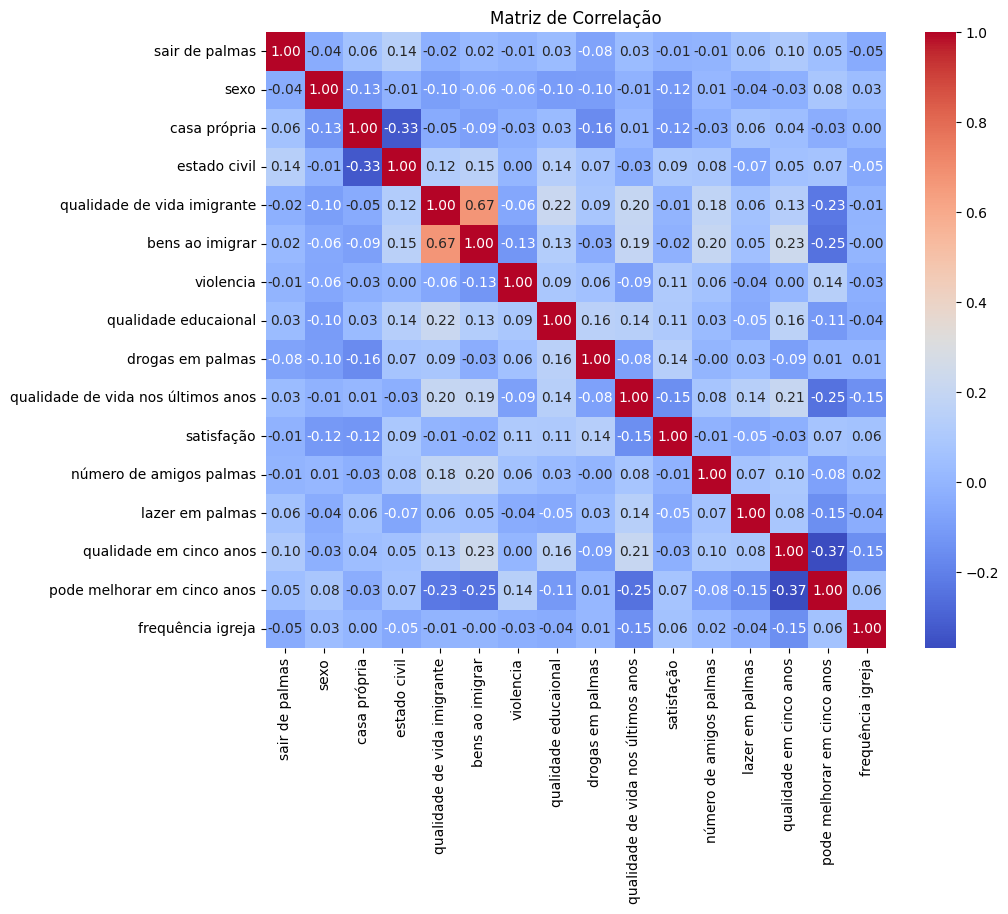

In [ ]:
corr_matrix = df[labelencoding].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

>Para analisar os dados sobre moradores de Palmas, irei realizar alguns testes estatísticos

**Testes Estatísticos**

1. **Teste de Normalidade**:
   - **Shapiro-Wilk**: verificar se as variáveis contínuas (renda familiar e renda pessoal) seguem uma distribuição normal.

2. **Teste de Homogeneidade de Variâncias**:
   - **Levene's Test**: Para verificar se as variâncias de duas ou mais grupos são iguais(estado civil por renda).

3. **Teste t de Student**:
   - Comparar médias de duas populações (renda familiar entre homens e mulheres).

4. **Correlação**:
   - **Coeficiente de Correlação de Pearson**: Verificar a relação entre variáveis contínuas, renda familiar e renda pessoal.

5. **Qui-quadrado**:
   - Verificar associações entre variáveis categóricas, estado civil e a posse de casa própria.


In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, pearsonr, chi2_contingency

In [ ]:
alpha = 0.05

> Teste de Normalidade

In [ ]:
stat, p = shapiro(df['renda familiar'])
print('Statisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('A distribuição é normal para renda familiar')
else:
    print('A distribuição não é normal para renda familiar')

stat, p = shapiro(df['renda pessoal'])
print('Statisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('A distribuição é normal para renda pessoal')
else:
    print('A distribuição não é normal para renda pessoal')

Statisticas=0.433, p=0.000
A distribuição não é normal para renda familiar
Statisticas=0.379, p=0.000
A distribuição não é normal para renda pessoal


> Teste de Homogeneidade de Variâncias

In [ ]:
df['estado civil'].unique()

array([3, 0, 4, 1, 2])

In [ ]:
stat, p = levene(df[df['estado civil'] == 0]['renda familiar'], df[df['estado civil'] == 1]['renda familiar'], df[df['estado civil'] == 2]['renda familiar'],
                 df[df['estado civil'] == 3]['renda familiar'], df[df['estado civil'] == 4]['renda familiar'])
print('Statisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('As variâncias são iguais')
else:
    print('As variâncias não são iguais')

Statisticas=2.869, p=0.024
As variâncias não são iguais


- O estado civil implica em uma difereça significativa na renda famíliar. Como as variâncias são diferentes, não cabe um teste T.

In [ ]:
stat, p = levene(df[df['sexo'] == 0]['renda pessoal'], df[df['sexo'] == 1]['renda pessoal'])
print('Statisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('As variâncias são iguais para ambos os sexos')
else:
    print('As variâncias não são iguais para ambos os sexos')

Statisticas=2.477, p=0.117
As variâncias são iguais para ambos os sexos


> Teste T

In [ ]:
homens = df[df['sexo'] == 0]['renda pessoal']
mulheres = df[df['sexo'] == 1]['renda pessoal']

t_stat, p_value = ttest_ind(homens, mulheres)
print('Teste t de Student para Renda Familiar entre Homens e Mulheres: Statistic = %.3f, p-value = %.3f' % (t_stat, p_value))
if p_value < alpha:
    print('Hipótese nula rejeitada. Há uma diferença significativa na renda pessoal entre homens e mulheres.')
else:
    print('Hipótese nula não rejeitada. Não há evidências de diferença significativa na renda pessoal entre homens e mulheres.')

Teste t de Student para Renda Familiar entre Homens e Mulheres: Statistic = -1.941, p-value = 0.053
Hipótese nula não rejeitada. Não há evidências de diferença significativa na renda pessoal entre homens e mulheres.


> Qui-quadrado

In [ ]:
tabela = pd.crosstab(df['estado civil'], df['casa própria'])
print("Tabela de contingência:")
print(tabela)

stat, p, dof, esperado = chi2_contingency(tabela)
print('Teste Qui-quadrado: Statistic = %.3f, p-value = %.3f' % (stat, p))
print('Valores esperados:')
print(esperado)
if p < alpha:
    print('Hipótese nula rejeitada. Há uma associação significativa entre o estado civil e a posse de casa própria.')
else:
    print('Hipótese nula não rejeitada. Não há evidências de associação significativa entre o estado civil e a posse de casa própria.')

Tabela de contingência:
casa própria   0   1
estado civil        
0             20  65
1              7  15
2              5   7
3             96  51
4              3   9
Teste Qui-quadrado: Statistic = 43.063, p-value = 0.000
Valores esperados:
[[40.05395683 44.94604317]
 [10.36690647 11.63309353]
 [ 5.65467626  6.34532374]
 [69.26978417 77.73021583]
 [ 5.65467626  6.34532374]]
Hipótese nula rejeitada. Há uma associação significativa entre o estado civil e a posse de casa própria.


## Conclusões

1. Teste de Normalidade (Shapiro-Wilk):

**Renda Familiar:** A distribuição não é normal.

**Renda Pessoal:** A distribuição não é normal.
2. Teste de Homogeneidade de Variâncias (Levene's Test):

**Renda Familiar por Estado Civil:** As variâncias não são iguais, indicando que o estado civil tem um impacto significativo na renda familiar.
**Renda Pessoal por Sexo:** As variâncias são iguais, sugerindo que o sexo pode não influenciar a renda pessoal.
3. Teste t de Student:

**Renda Pessoal entre Homens e Mulheres:** O teste t indicou que não existe uma diferença significativa na renda pessoal entre homens e mulheres.
4. Teste Qui-quadrado:

**Estado Civil e Posse de Casa Própria**: Foi encontrada uma associação significativa entre o estado civil e a posse de casa própria. A hipótese nula foi rejeitada, indicando que o estado civil está relacionado à probabilidade de possuir uma casa própria.

**Observações:**

>A não normalidade das variáveis de renda é um ponto importante a ser considerado em análises futuras. Pode ser necessário aplicar transformações para normalizar os dados ou usar testes não paramétricos.
As diferenças de variâncias entre grupos indicam a necessidade de cautela ao comparar médias.

# Modelagem

>Agora, irei tentar realizar a predição da permanência ou não dos moradores de Palmas na cidade.

- Como a quantidade de dados é pequena, arvores de classificação tendem a ficar sensiveis e causar overfitiing.

- Usarei regressão logistica, arvores aleatorias e diminuição de profundidade para evitar este overfitting.

In [ ]:
df.head()

,sexo,idade,estado civil,nível de instrução,casa própria,filhos,moradores,renda familiar,renda pessoal,tempo em palmas,...,emprego específico_TÉCNICO FARMÁCIA,emprego específico_UBER,emprego específico_VENDA DE IMÓVEIS,emprego específico_VENDAS,emprego específico_VENDEDOR,emprego específico_VENDEDORA,emprego específico_VENDEDORA DE FARMÁCIA,emprego específico_VERIFICAÇÃO E IMPORTAÇÃO DE PRODUTOS,"emprego específico_VIDEOMARKER, COMUNICAÇÃO",emprego específico_ÁREA DA SAÚDE
0,0,23,3,4,0,1,3,4200.0,2400.0,23.0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,0,3,1,2,5,5000.0,3800.0,11.0,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0,4,0,1,3,3000.0,1500.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3,0,26,3,5,1,1,3,3000.0,1800.0,5.0,...,0,0,0,0,0,1,0,0,0,0
4,1,50,4,3,1,3,1,1320.0,1320.0,22.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
x = df.drop(columns=['sair de palmas'])
y = df['sair de palmas']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
modelos = {
    'Regressão Logística': LogisticRegression(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'Floresta Aleatória': RandomForestClassifier()
}

In [ ]:
melhores_modelos = {}

for nome, modelo in modelos.items():
  print(f"Modelo: {nome}")

  modelo.fit(X_train, y_train)

  y_pred = modelo.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {accuracy}")

  if accuracy > 0.8:
    melhores_modelos[nome] = modelo

Modelo: Regressão Logística
Acurácia: 0.8214285714285714
Modelo: Árvore de Decisão
Acurácia: 0.6071428571428571
Modelo: Floresta Aleatória


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia: 0.8214285714285714


In [ ]:
from sklearn.model_selection import cross_val_score

for nome, modelo in melhores_modelos.items():
  scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
  print(f"Modelo: {nome}")
  print(f"Acurácia Média: {scores.mean()}")
  print(f"Desvio Padrão: {scores.std()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Modelo: Regressão Logística
Acurácia Média: 0.7433333333333334
Desvio Padrão: 0.016531129329679827
Modelo: Floresta Aleatória
Acurácia Média: 0.7475757575757577
Desvio Padrão: 0.01900601078808835


- A acuracia está relativamente boa para os diferentes folds, o que não evidencia um overfiting ou underfiting claro em relação ao treinamento do modelo.

In [ ]:
parametros = {
    'Regressão Logística': {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                            'penalty': ['l2', 'l1'],
                            'max_iter': [1500],
                            'solver': ['liblinear']
                            },
    'Floresta Aleatória': {'n_estimators': [10, 50, 100, 200, 300, 400],
                           'criterion': ['gini', 'entropy'],
                           'max_depth':[50, 70, 100, 150, 200]}
}

In [ ]:
melhor_acuracia = 0
modelo_final = None
melhor_nome = None

for nome, modelo in melhores_modelos.items():
  grid_search = GridSearchCV(modelo, parametros[nome], cv=5, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)
  melhores_parametros = grid_search.best_params_
  accuracia_treino = grid_search.best_score_
  y_pred = grid_search.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"Modelo: {nome}")
  print(f"Acurácia de Treino: {accuracia_treino}")
  print(f"Acurácia de teste: {accuracy}")
  print(f"Melhores Parâmetros: {melhores_parametros}")

  if accuracy > melhor_acuracia:
    melhor_acuracia = accuracy
    modelo_final = grid_search.best_estimator_
    melhor_nome = nome

Modelo: Regressão Logística
Acurácia de Treino: 0.7432323232323232
Acurácia de teste: 0.8214285714285714
Melhores Parâmetros: {'C': 0.01, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'liblinear'}
Modelo: Floresta Aleatória
Acurácia de Treino: 0.7612121212121211
Acurácia de teste: 0.8214285714285714
Melhores Parâmetros: {'criterion': 'gini', 'max_depth': 70, 'n_estimators': 300}


## Modelo Final

In [ ]:
y_pred = modelo_final.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Modelo: {melhor_nome}")
print(f"Acurácia do Modelo Final: {accuracy}")
print('Métricas Gerais:')
print(classification_report(y_test, y_pred))

Modelo: Regressão Logística
Acurácia do Modelo Final: 0.8214285714285714
Métricas Gerais:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       0.00      0.00      0.00        10

    accuracy                           0.82        56
   macro avg       0.41      0.50      0.45        56
weighted avg       0.67      0.82      0.74        56



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y.value_counts()

,count
sair de palmas,
0,211
1,67


### Testanto Limiar Diferente

In [ ]:
y_probs = modelo_final.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_limear = (y_probs >= threshold).astype(int)

accuracia = accuracy_score(y_test, y_pred_limear)
print(f"Modelo: {melhor_nome}")
print(f"Acurácia do Modelo Final: {accuracia}")
print('Métricas Gerais:')
print(classification_report(y_test, y_pred_limear))

Modelo: Regressão Logística
Acurácia do Modelo Final: 0.6964285714285714
Métricas Gerais:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        46
           1       0.11      0.10      0.11        10

    accuracy                           0.70        56
   macro avg       0.46      0.46      0.46        56
weighted avg       0.68      0.70      0.69        56



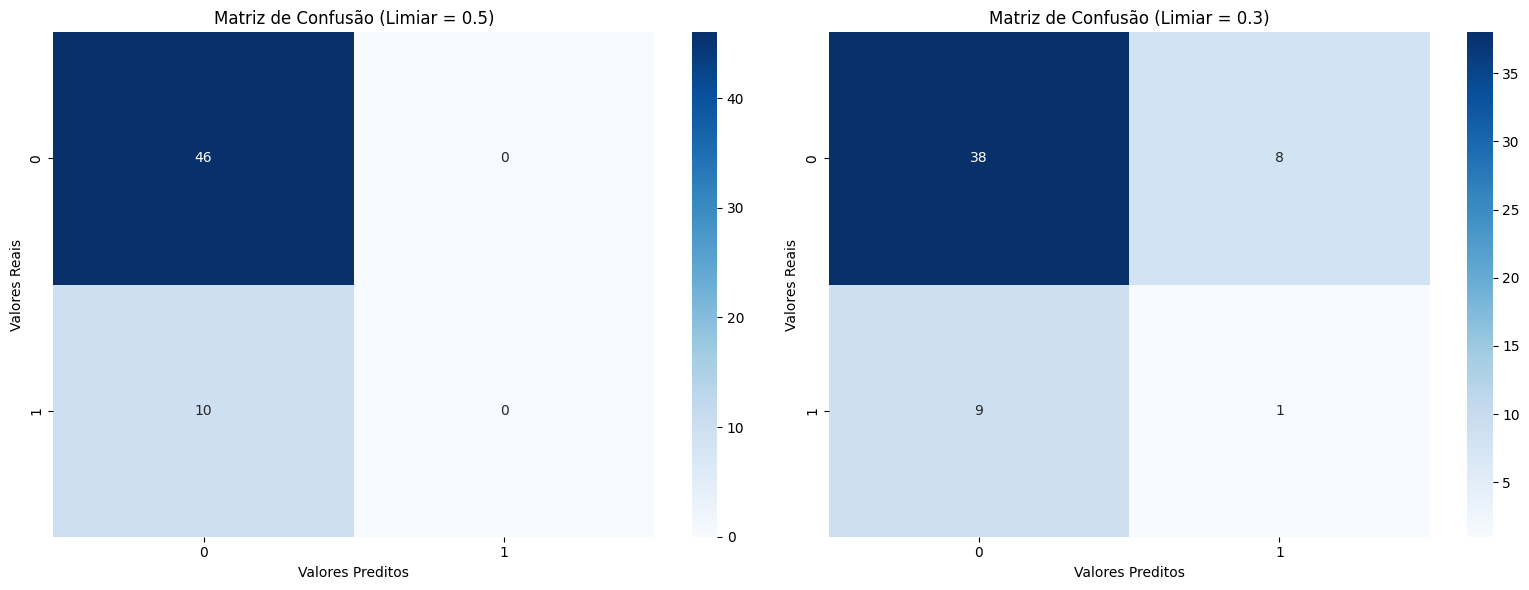

In [ ]:
matriz_confusao1 = confusion_matrix(y_test, y_pred_limear)
matriz_confusao2 = confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(matriz_confusao2, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão (Limiar = 0.5)')
axes[0].set_xlabel('Valores Preditos')
axes[0].set_ylabel('Valores Reais')

sns.heatmap(matriz_confusao1, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matriz de Confusão (Limiar = 0.3)')
axes[1].set_xlabel('Valores Preditos')
axes[1].set_ylabel('Valores Reais')

plt.tight_layout()
plt.show()

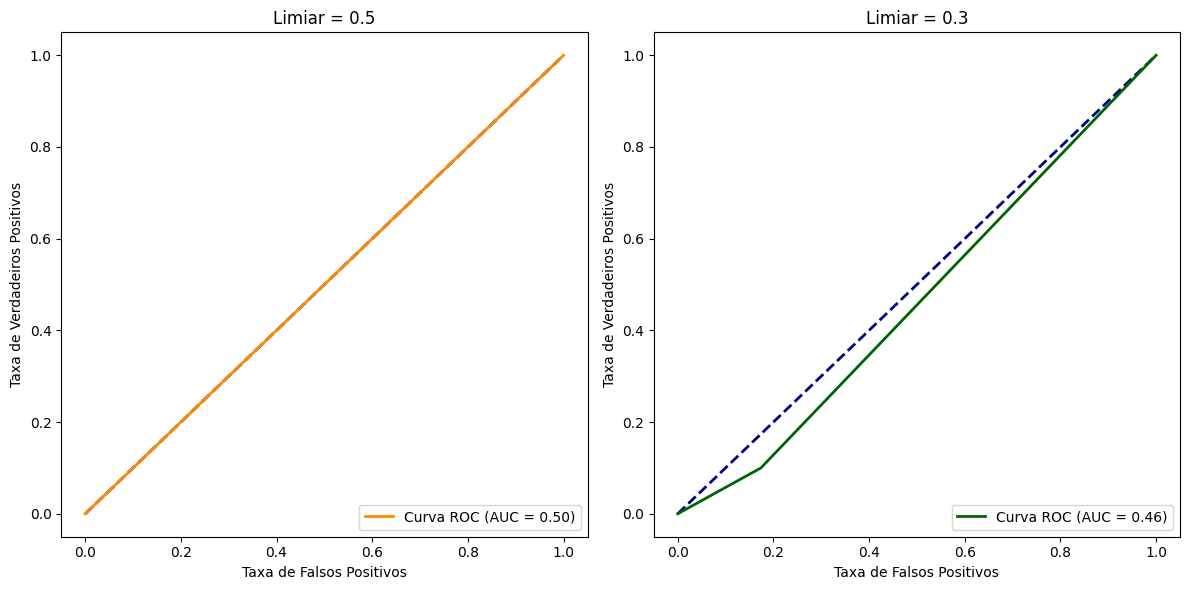

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_limear)
roc_auc1 = roc_auc_score(y_test, y_pred_limear)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
axes[0].set_xlabel('Taxa de Falsos Positivos')
axes[0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0].set_title('Limiar = 0.5')
axes[0].legend(loc="lower right")

axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].plot(fpr1, tpr1, color='darkgreen', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc1)
axes[1].set_xlabel('Taxa de Falsos Positivos')
axes[1].set_ylabel('Taxa de Verdadeiros Positivos')
axes[1].set_title('Limiar = 0.3')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

## Colunas Mais Descritivas

In [ ]:
coefs = modelo_final.coef_[0]

In [ ]:
features_importantes = pd.Series(data =coefs, index=X_train.columns).sort_values(ascending=False)

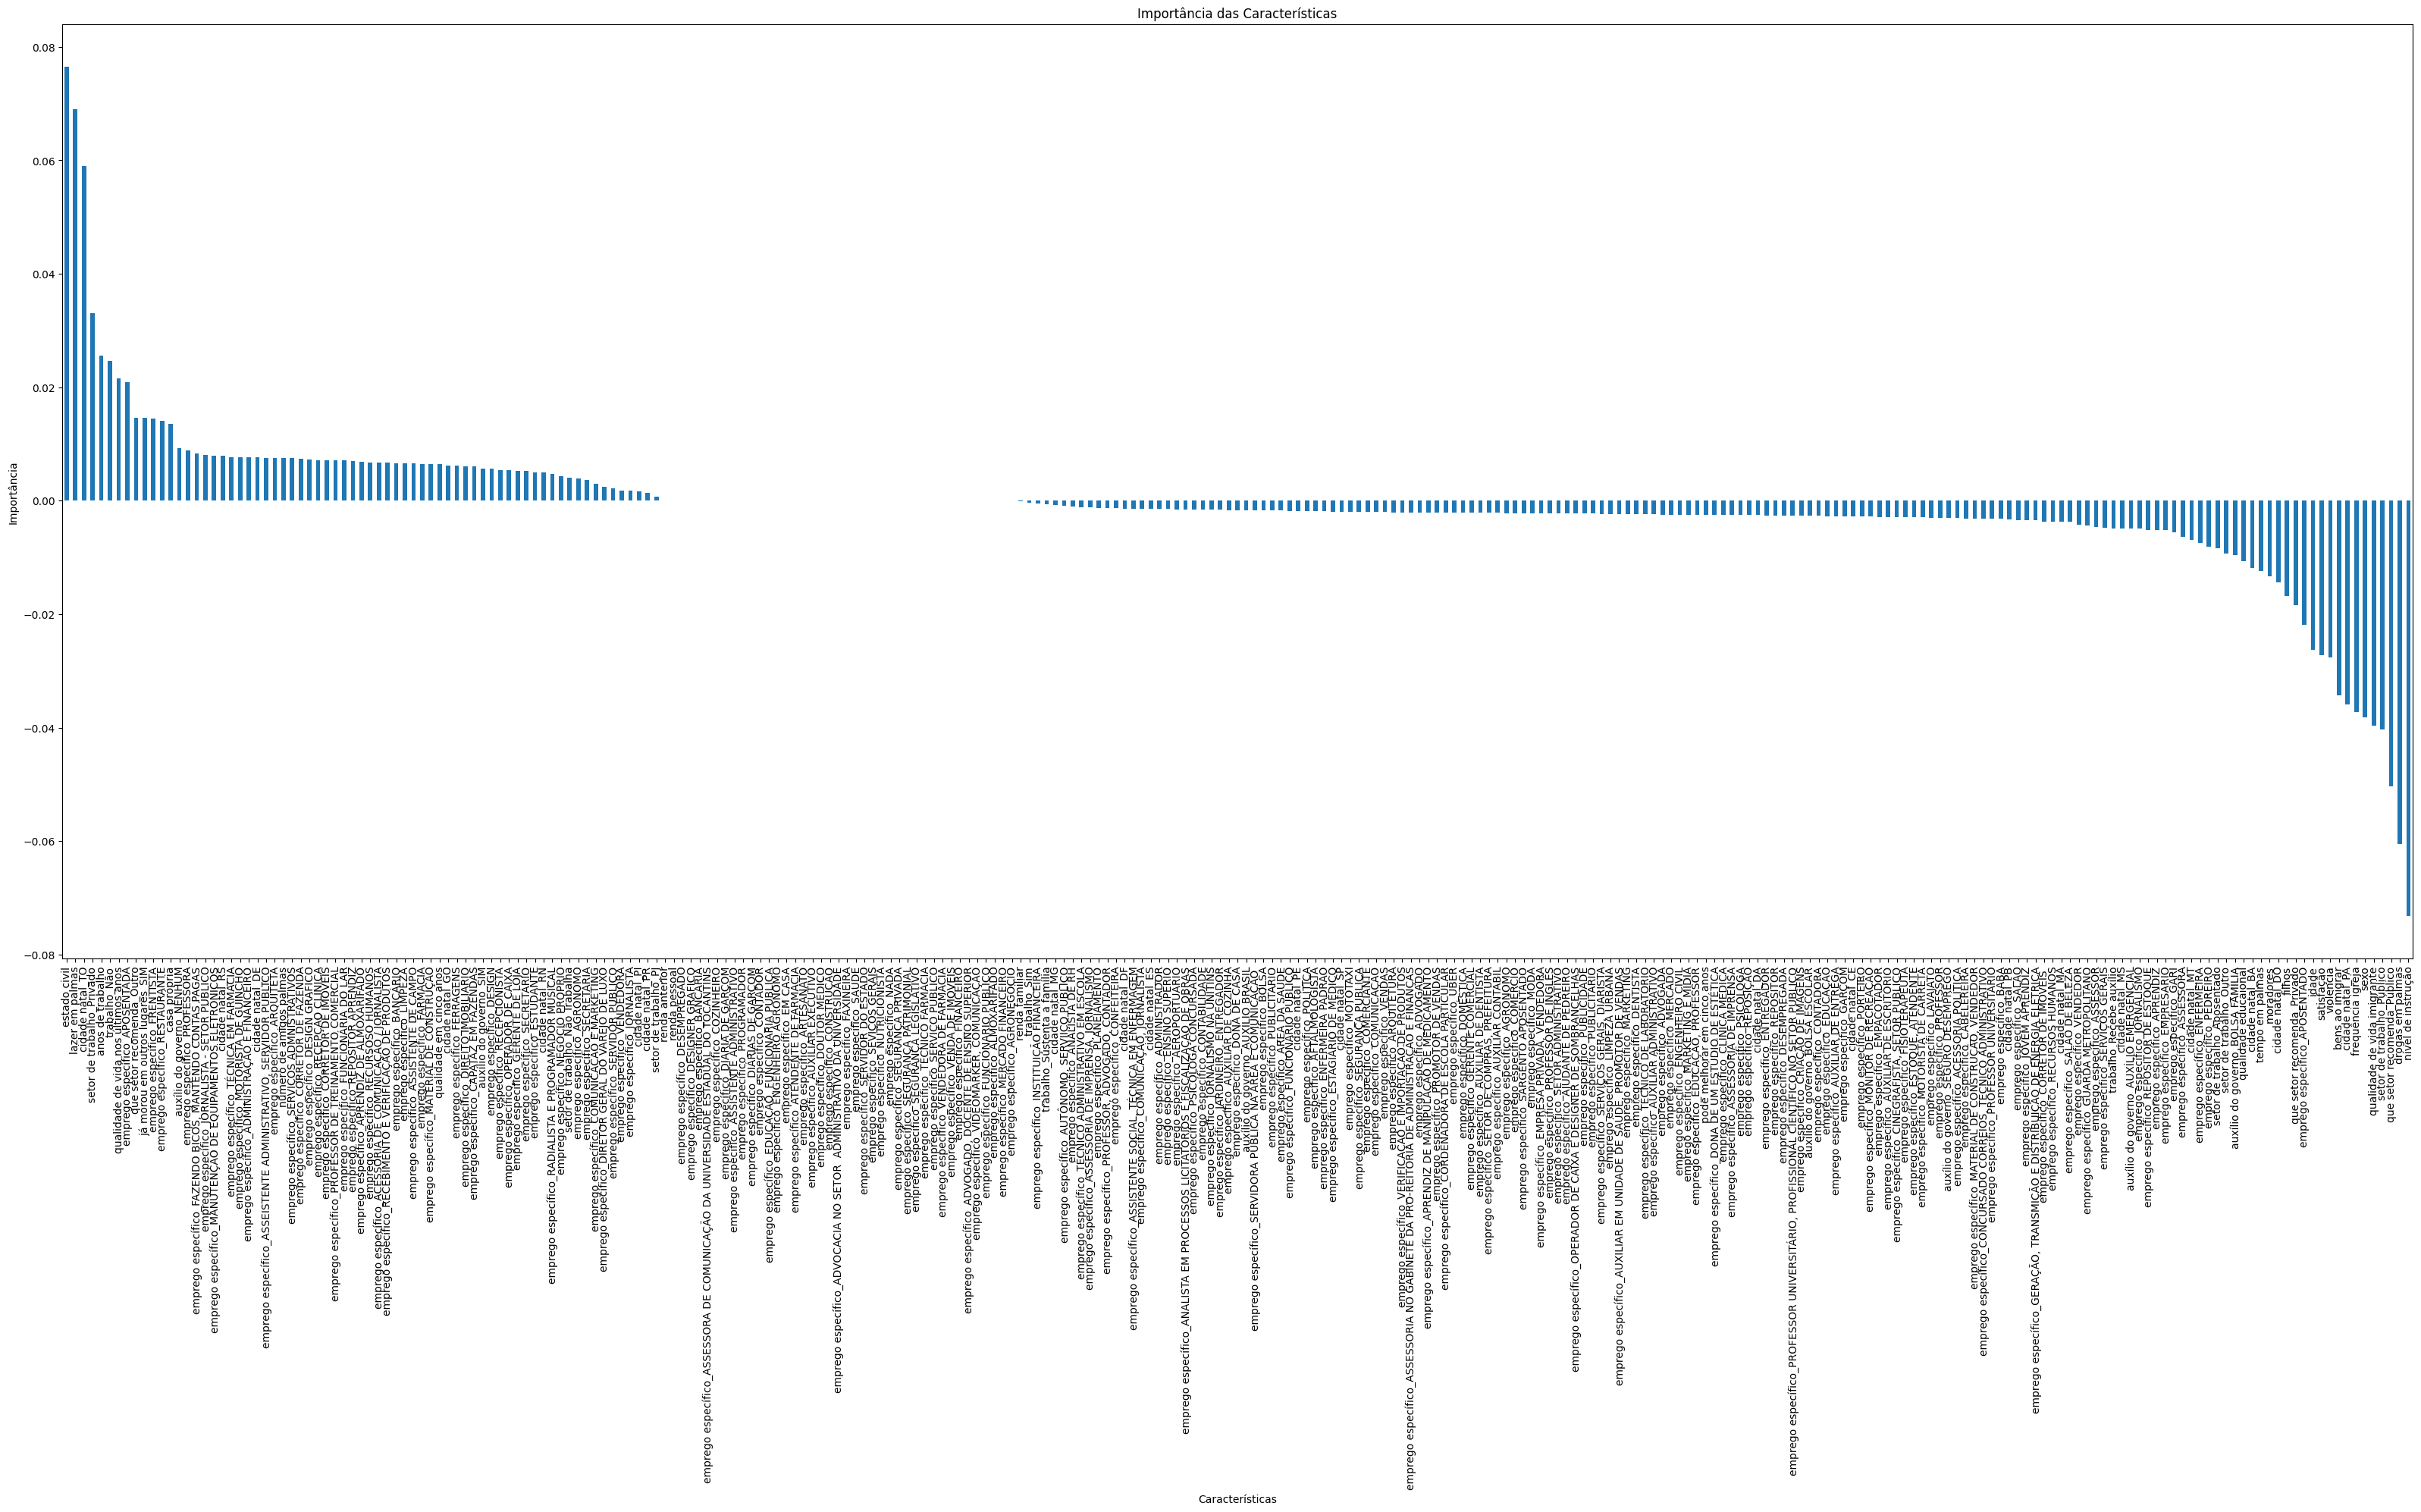

In [ ]:
features_importantes.plot(kind='bar', figsize=(40, 16))
plt.title('Importância das Características')
plt.xlabel('Características')
plt.ylabel('Importância')
plt.show()

# Conclusões

> O modelo não consegue gerar previsões para moradores que tendem a abandonar Palmas, porém, consegue fazer boas previsões para moradores que desejam permanecer na cidade.

> Vale se atentar que o modelo pode estar gerando respostas apenas para a classe $0$, o que pode não ser ideal e foi ajustado com uma mudança no limiar de decisão. A mudança prejudicou a predição de moradores que desejam ficar na cidade, porém restringiu os mesmos a valores que serão mais criteriosos na definição de quem realmente desena permanecer em Palmas.